# DeepSleep 
## Notas
* En Saola hay periodos que no se va a dormir y se une con el siguiente. Probar si es por el tamaño de los periodos

## v1

- board
- r (run duration)
- ds (deep sleep duration)
- TX (test version)

## T

- Muestra: 240seg
- PowerProfiler freq: 10ms

In [1]:
board="wemosd1"
r = 10
ds = 10
TX = 1

batteries = [0.8, 2, 4, 10] #Ah

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

experiment_name = f"--{board}_r{r}_ds{ds}-T{TX}"
filename = f"../data/dslp{experiment_name}.csv"
print(experiment_name)

--wemosd1_r10_ds10-T1


In [3]:
df = pd.read_csv(filename, parse_dates=["read_at", "timestamp"])

df.columns = ['index','read_at', 'millis', "dt", "v", "a", "w", "v_sh"]
df

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-03-04 21:57:04.178285,178179,2025-03-04 21:57:04,5.064,0.0756,0.38284,0.00756
1,1,2025-03-04 21:57:04.188464,178189,2025-03-04 21:57:04,5.064,0.0772,0.39094,0.00772
2,2,2025-03-04 21:57:04.198496,178199,2025-03-04 21:57:04,5.064,0.0772,0.39094,0.00772
3,3,2025-03-04 21:57:04.209697,178211,2025-03-04 21:57:04,5.064,0.0768,0.38892,0.00768
4,4,2025-03-04 21:57:04.220508,178221,2025-03-04 21:57:04,5.064,0.0764,0.38689,0.00764
...,...,...,...,...,...,...,...,...
20977,20977,2025-03-04 22:01:04.119547,418111,2025-03-04 22:01:04,5.072,0.0728,0.36924,0.00728
20978,20978,2025-03-04 22:01:04.131289,418123,2025-03-04 22:01:04,5.064,0.0720,0.36461,0.00720
20979,20979,2025-03-04 22:01:04.142212,418134,2025-03-04 22:01:04,5.064,0.0724,0.36663,0.00724
20980,20980,2025-03-04 22:01:04.152717,418144,2025-03-04 22:01:04,5.072,0.0724,0.36721,0.00724


In [4]:
#remove the trailing data before reset
d = df#[df.millis.idxmin():]
d

,index,read_at,millis,dt,v,a,w,v_sh
0,0,2025-03-04 21:57:04.178285,178179,2025-03-04 21:57:04,5.064,0.0756,0.38284,0.00756
1,1,2025-03-04 21:57:04.188464,178189,2025-03-04 21:57:04,5.064,0.0772,0.39094,0.00772
2,2,2025-03-04 21:57:04.198496,178199,2025-03-04 21:57:04,5.064,0.0772,0.39094,0.00772
3,3,2025-03-04 21:57:04.209697,178211,2025-03-04 21:57:04,5.064,0.0768,0.38892,0.00768
4,4,2025-03-04 21:57:04.220508,178221,2025-03-04 21:57:04,5.064,0.0764,0.38689,0.00764
...,...,...,...,...,...,...,...,...
20977,20977,2025-03-04 22:01:04.119547,418111,2025-03-04 22:01:04,5.072,0.0728,0.36924,0.00728
20978,20978,2025-03-04 22:01:04.131289,418123,2025-03-04 22:01:04,5.064,0.0720,0.36461,0.00720
20979,20979,2025-03-04 22:01:04.142212,418134,2025-03-04 22:01:04,5.064,0.0724,0.36663,0.00724
20980,20980,2025-03-04 22:01:04.152717,418144,2025-03-04 22:01:04,5.072,0.0724,0.36721,0.00724


Text(0.5, 1.0, 'Current')

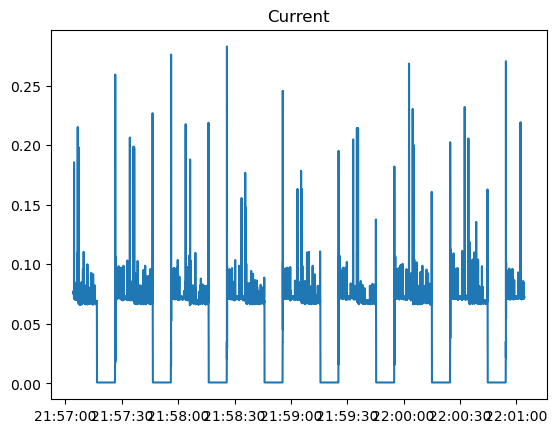

In [5]:
plt.plot(d.read_at, d.a)
plt.title("Current")

Text(0.5, 1.0, 'Voltage')

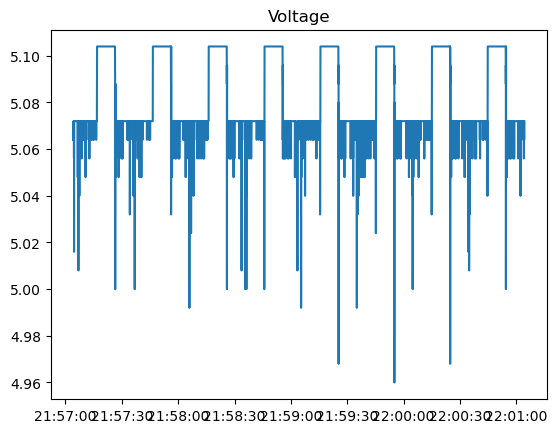

In [6]:
plt.plot(d.read_at, d.v)
plt.title("Voltage")

In [7]:
from scipy import integrate

time_data = (d.read_at - d.read_at.iloc[0]).dt.total_seconds()
current_data = d.a.to_numpy()
total_current = integrate.trapezoid(current_data, time_data)
total_current #A in timespan

np.float64(11.767610361000003)

In [8]:
time_span = max(time_data)
time_span #seg

239.985957

In [9]:
avg_current = total_current / time_span
avg_current #A

np.float64(0.049034578973302184)

## Expected runtime using batteries

In [10]:
for bat_usable_cap in batteries: #Amp hour
    runtime = bat_usable_cap / avg_current
    print(f"At {bat_usable_cap:.02f}Ah:\t{runtime:.01f} hours,\t{runtime/24:.02f} days")

At 0.80Ah:	16.3 hours,	0.68 days
At 2.00Ah:	40.8 hours,	1.70 days
At 4.00Ah:	81.6 hours,	3.40 days
At 10.00Ah:	203.9 hours,	8.50 days
